# Выпускной проект

## Содержание:

* Шаг 1. Описание задачи, загрузка данных
* Шаг 2. Обзор и предобработка данных
* Шаг 3. Исследовательский анализ данных
* Шаг 4. Формулировка и проверка гипотез
* Шаг 5. Сегментация
* Шаг 6. Выводы исследования

## Шаг 1. Описание задачи, загрузка данных
   
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Проблема банка "Метанпром" - катастрофический отток клиентов. Эту проблему нужно срочно решить, чтобы спасти банк. 
Заказчик исследования - отдел маркетинга, куда необходимо предоставить исчерпывающую информацию для принятия решения по снижению оттока. 

Задача: провести анализ и подготовить план действий по удержанию клиентов (представить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока), в том числе:
* провести сегментацию пользователей на основе данных о количестве потребляемых продуктов (на 3 шаге);
* проверить гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним (на 4 шаге);
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.     

Описание датасета:
* 'USERID' — идентификатор пользователя,
* 'score' — баллы кредитного скоринга,
* 'city' — город;
* 'gender' — пол;
* 'age' — возраст;
* 'equity' — балльная оценка имущества клиента;
* 'balance' — баланс на счёте, рублей РФ,
* 'products' — количество продуктов, которыми пользуется клиент,
* 'credit_card' — есть ли кредитная карта,
* 'last_activity' — лайфтайм последней активности, месяцев,
* 'EST_SALARY' — заработная плата клиента, рублей РФ,
* 'сhurn' — ушёл клиент банка, или нет.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import numpy as np
from scipy import stats as st

In [75]:
# чтение файла с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1Q9_gSHSfe-AqwI3mLANe46jeS_CQMl8F"
df = pd.read_csv(path)
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,106217,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,113370,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0


Промежуточный вывод: датасет успешно сохранён, коррекция разделителя столбцов не требуется. Можно приступать к предобработке данных.

## Шаг 2 . Обзор и предобработка данных

In [76]:
df.info()                                                            # Выведем общую информацию
print('    Дубликатов, шт: {:.0f} ({:.1%})'.format(df.duplicated().sum(), df.duplicated().sum()/len(df)))
print('    Дубликатов по столбцу USERID, шт: {:.0f} ({:.1%})'.format(df['USERID'].duplicated().sum(), df['USERID'].duplicated().sum()/len(df))) # Выведем кол-во дубликатов
print('    Пропусков по столбцам:')
display(df.isna().sum()) # подсчёт пропусков
print('    Вывод статистической информации:')
display(round(df.describe().T,2))
print('    Варианты значений по некоторым столбцам:')
display(df['city'].value_counts())
display(df['gender'].value_counts())
display(df['equity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB
    Дубликатов, шт: 1 (0.0%)
    Дубликатов по столбцу USERID, шт: 17 (0.2%)
    Пропусков по столбцам:


USERID              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

    Вывод статистической информации:


,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,162530.73,38965.78,94561.0,128680.50,162577.5,196232.50,2.291450e+05
score,10000.0,848.41,65.80,642.0,801.00,853.0,900.00,1.000000e+03
age,10000.0,42.84,12.13,18.0,34.00,40.0,51.00,8.600000e+01
equity,10000.0,2.63,1.98,0.0,0.00,3.0,4.00,9.000000e+00
balance,7705.0,827794.31,1980614.15,0.0,295554.16,524272.2,980705.85,1.191136e+08
products,10000.0,1.87,0.80,0.0,1.00,2.0,2.00,5.000000e+00
credit_card,10000.0,0.68,0.47,0.0,0.00,1.0,1.00,1.000000e+00
last_activity,10000.0,0.52,0.50,0.0,0.00,1.0,1.00,1.000000e+00
EST_SALARY,10000.0,147866.89,139388.51,2546.3,75251.90,119658.1,174500.54,1.395064e+06
churn,10000.0,0.18,0.39,0.0,0.00,0.0,0.00,1.000000e+00


    Варианты значений по некоторым столбцам:


Ярославль    5906
Рыбинск      2663
Ростов       1431
Name: city, dtype: int64

М    5008
Ж    4992
Name: gender, dtype: int64

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Необходимо удалить полные дубликаты и дубликаты по user_id:

In [77]:
print('Длина до',len(df))
df.drop_duplicates(inplace=True)
print('Длина после удаления явного дубликата',len(df))
df.drop_duplicates(subset='USERID',inplace=True)
print('Длина после удаления дубликатов в столбце USERID',len(df))

Длина до 10000
Длина после удаления явного дубликата 9999
Длина после удаления дубликатов в столбце USERID 9983


Промежуточный вывод: по данным отображенной информации, необходимо название столбцов привести к змеимному регистру.

In [78]:
df = df.rename(columns={  
    'USERID':'user_id',
    'EST_SALARY':'est_salary'})
print('Итого:',df.columns)

Итого: Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


### Ликвидация пропусков

Необходимо ликвидировать пропуски. Поскольку пропусков по столбцу 'balance' слишком много, чтобы их удалять (2295/10000 =23%), поэтому попробуем их восстановить при помощи машинного обучения... 

Осуществим преобразование текстовых (категориальных) данных для машинного обучения:

In [79]:
df.head(10)
df_city = pd.get_dummies(df[['city']])
#df_city = pd.get_dummies(df[['city']],drop_first=True) #или так с удалением мультиколлинеарного признака
df_city = df_city.rename(columns={  
    'city_Ростов':'city_ro',
    'city_Рыбинск':'city_ri',
    'city_Ярославль':'city_ya'})

#df_new = df.drop(columns=['city']).join(df_city)
df_new = df.join(df_city)
df_new['gender'] = df_new['gender'].map({'М':1,'Ж':0})

display(df_new.head(5))
#df_new.info()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya
0,106217,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,0,1,0
3,113370,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1


Перед построением матрицы для МО желательно проверить мультиколлинеарность между признаками:

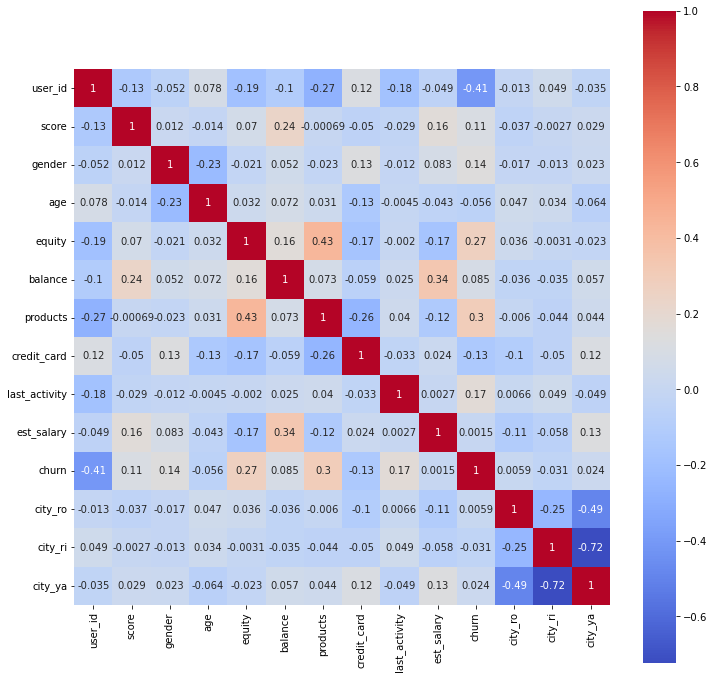

In [80]:
# корреляционная матрица
corr_df = df_new.corr() # напишите ваш код здесь

# нарисуем heatmap
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, square = True, annot = True,cmap='coolwarm' )
plt.show()

Промежуточный вывод: кроме отрицательной корреляции между признаками городов, между другими признаками высокой корреляции нет.

Для лучшей обучаемости модели МО и улучшения качества прогноза, удалим из передаваемого в модель МО датафрейма столбцы, которые, как представляется, не должны оказывать влияние на баланс счета и которые имеют мультиколлинеарность:

In [81]:
df_new_for_model = df_new[df_new['balance']>=0]

list_column = ['score', 'age', 'equity', 'balance','products', 'est_salary']
df_new_for_model = df_new_for_model[list_column]
print('Пропусков в balance:',df_new_for_model['balance'].isna().sum())
df_new_for_model.head(5)

Пропусков в balance: 0


,score,age,equity,balance,products,est_salary
0,850.0,25,1,59214.82,2,75719.14
1,861.0,37,5,850594.33,3,86621.77
3,866.0,51,5,1524746.26,2,174423.53
4,730.0,34,5,174.00,1,67353.16
5,856.0,56,4,863687.24,3,156619.80


Разобьем данные на обучающую и валидационную выборки:

In [82]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_new_for_model.drop('balance', axis=1)
y = df_new_for_model['balance']
#y.head(10)
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

Стандартизируем выборки:

In [83]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)


Зададим модели и функции, которые будут выводить необходимые метрики:

In [84]:
# зададим список моделей
models = [LinearRegression(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / (y_true+0.00000000000000000000000001)
    return perc_error_abs.sum() / len(y_true)

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'MAE:{:.0f} MSE:{:.0f} MAPE:{:.2f} R2:{:.3f} '.format(
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            mape(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test, 
    )
    print()


LinearRegression()
MAE:533668 MSE:10174719181678 MAPE:18070039735589287427982753792.00 R2:0.086 

Lasso()
MAE:533668 MSE:10174720110922 MAPE:18069802842495515682479800320.00 R2:0.086 

Ridge()
MAE:533654 MSE:10174778126285 MAPE:18059918377419158939829796864.00 R2:0.086 

DecisionTreeRegressor()
MAE:569852 MSE:9996024530999 MAPE:1918610642439974102602088448.00 R2:0.102 

RandomForestRegressor()
MAE:466805 MSE:9776845351509 MAPE:2220487365347179591087685632.00 R2:0.122 

GradientBoostingRegressor()
MAE:450990 MSE:9569369148845 MAPE:3116378950346157332073807872.00 R2:0.140 



Хотя по метрикам наилучший результат показал алгоритм GradientBoostingRegressor(), его применение в ячейке ниже отражает прогнозные данные баланса сильно отличающиеся от фактических, местами отрицательные! 
В связи с этим, методом подбора была выбрана в качестве финальной модели DecisionTreeRegressor(), что дает результат наиболее близкий к фактическим значениям.

Обучим финальную модель:

In [90]:
# обучим финальную модель
final_model = DecisionTreeRegressor()
final_model.fit(X_train, y_train)

#y_pred_final = final_model.predict(df_new_for_model_final.drop('balance', axis=1))
df_new_for_model_final = df_new[list_column]

predict = final_model.predict(df_new_for_model_final.drop('balance', axis=1))
df_new_for_model_final['predict'] = predict
df_new_for_model_final[['balance','predict']].tail(40)

C:\Users\Павел\AppData\Local\Temp\ipykernel_4264\2507137633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_for_model_final['predict'] = predict


,balance,predict
9960,486215.69,1213380.76
9961,446187.27,446187.27
9962,1571192.11,1571192.11
9963,3431029.03,3431029.03
9964,NaN,3437773.09
9965,499865.43,499865.43
9966,NaN,298228.06
9967,59100.34,59100.34
9968,725371.47,725371.47
9969,NaN,1429394.84


Выведем на экран важность признаков...

In [91]:
fi_df = pd.DataFrame(
    data={'feature': df_new_for_model_final.drop('balance', axis=1).drop('predict', axis=1).columns, 
    'importance': final_model.feature_importances_}).sort_values(by='importance',ascending=False)

print(fi_df)

      feature  importance
1         age    0.426576
4  est_salary    0.337222
0       score    0.185958
2      equity    0.036843
3    products    0.013401


Заменим пропуски на прогноз машинного обучения и удалим лишние столбцы:

In [92]:
df_new['balance']=df_new['balance'].fillna(df_new_for_model_final['predict'])
print('Пропусков в balance:',df_new['balance'].isna().sum())
df_new.head()

Пропусков в balance: 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya
0,106217,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,Рыбинск,0,30,0,217572.05,1,1,1,107683.34,0,0,1,0
3,113370,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1


Промежуточный вывод: пропуски в столбце balance заменены на данные, полученные при помощи алгоритма машинного обучения DecisionTreeRegressor()

### Итоговые датафреймы для работы
Для дальнейшего удобства ещё раз выведем на экран пять первых строк датафрейма и описание его столбцов:
* 'user_id' — идентификатор пользователя,
* 'score' — баллы кредитного скоринга,
* 'city' — город;
* 'gender' — пол;
* 'age' — возраст;
* 'equity' — балльная оценка имущества клиента;
* 'balance' — баланс на счёте, рублей РФ,
* 'products' — количество продуктов, которыми пользуется клиент,
* 'credit_card' — есть ли кредитная карта,
* 'last_activity' — лайфтайм последней активности, месяцев,
* 'est_salary' — заработная плата клиента, рублей РФ,
* 'сhurn' — ушёл клиент банка, или нет.

In [93]:
df_new.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya
0,106217,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,Рыбинск,0,30,0,217572.05,1,1,1,107683.34,0,0,1,0
3,113370,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1


## Шаг 3. Исследовательский анализ данных

Отобразим удобную таблицу для сранения признаков в двух группах (оставшихся и ушедших в отток) при помощи метода groupby(), совместив с результатом работы метода describe():

In [94]:
df_churn = round(df_new.groupby('churn').agg('mean').T,2).rename(columns={0:'churn_0',1:'churn_1'})

df_describe = round(df_new.describe(),2).T[['mean','min','25%','50%','75%','max']]
df_churn = df_churn.join(df_describe)
df_churn['max'] = round(df_churn['max'])
df_churn

,churn_0,churn_1,mean,min,25%,50%,75%,max
user_id,170024.82,128549.12,162455.08,94561.0,128567.00,162464.00,196192.00,229145.0
score,845.03,863.41,848.39,642.0,801.00,853.00,900.00,1000.0
gender,0.47,0.65,0.50,0.0,0.00,1.00,1.00,1.0
age,43.17,41.40,42.85,18.0,34.00,40.00,51.00,86.0
equity,2.38,3.76,2.63,0.0,0.00,3.00,4.00,9.0
balance,742344.96,1133218.19,813683.34,0.0,217572.05,434204.33,917854.68,119113552.0
products,1.76,2.38,1.88,0.0,1.00,2.00,2.00,5.0
credit_card,0.71,0.55,0.68,0.0,0.00,1.00,1.00,1.0
last_activity,0.48,0.70,0.52,0.0,0.00,1.00,1.00,1.0
est_salary,147670.17,148199.98,147766.86,2546.3,75229.89,119553.34,174495.66,1395064.0


Промежуточный вывод: не смотря на совпадение зарплаты межу двумя группами, к <b> оттоку больше тяготеют</b> активные (с активностью в последнем месяце - 70%) и вероятно <b>более надежные клиенты (с более высоким кредитным рейтингом 863 баллов и балльной оценкой имущества клиента 3,76), чаще мужчины (65% мужчин), с низким числовым значением user_id (около 128тыс), и сравнительно большим количеством используемых продуктов 2,38 (вероятно, какой-то продукт не устраивает и даже огорчает)</b>, у которых часто отсутствует кредитная карта (используют в среднем только 55% клиентов).

Также можно обратить внимание, что баланс у клиентов, ушедших в отток - выше третьего перцентиля, то есть эти клиенты - обладатели счетов с очень большими суммами денежных средств, не характерными для большинства клиентов.

Оставшиеся клиенты отличаются меньшей активностью (48%), меньшей надежностью (кредитный рейтинг 845 - ниже среднего, низкая бальная оценка имущества 2,38), чаще женщины (мужчин всего 47%), с более высоким уровнем user_id (в среднем 170тыс), низким  количеством используемых продуктов - 1,76

### Построение графиков для числовых данных

Построим для числовых столбцов гистограммы, а для столбцов с категориальными данными - столбчатые диаграммы:

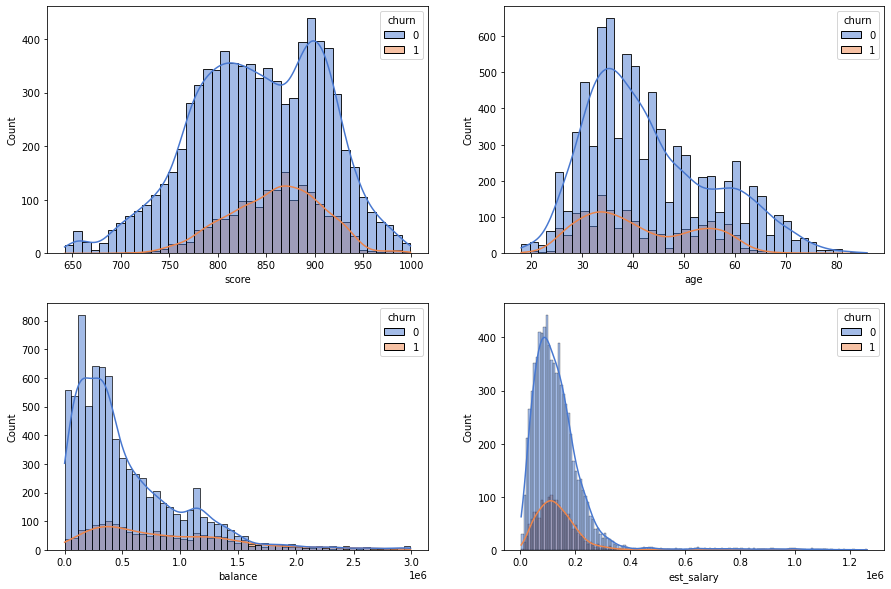

In [95]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15, 10))
 #вытягиваем
ax = ax.flatten()
list_number = ['score','age', 'balance', 'est_salary']
df_new[df_new['balance']<3000000] # для ликвидации выбросов на гистограмме balance
for i in range(len(list_number)):
    sns.histplot(data = df_new[df_new['balance']<3000000], x = list_number[i], hue='churn', ax=ax[i], kde = True,palette='muted')
plt.show() 

Отразим подробнее гистограмму распределения количества клиентов с балансом от 1,5 до 10 млн рублей:

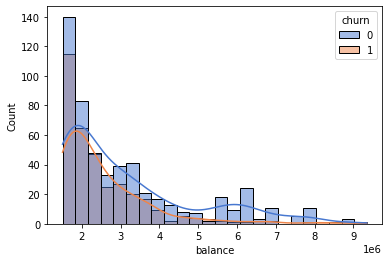

In [96]:
sns.histplot(data = df_new[(df_new['balance']>1500000)&(df_new['balance']<10000000)],
    x = 'balance', hue='churn', kde = True,palette='muted')
plt.show() 

Промежуточный вывод: судя по гистограммам, распределение числовых значений близко к нормальному, нет значительных аномалий. Ушедшие в отток клиенты среди отраженных на гистрограммах параметров примерно равномерно распределены среди общего количества клиентов (около 1/4), аномалий нет. 

Исключение составляют клиенты с высоким балансом: многие клиенты с балансом более 1,5 млн рублей ушли в отток.

### Построение графиков для категориальных данных

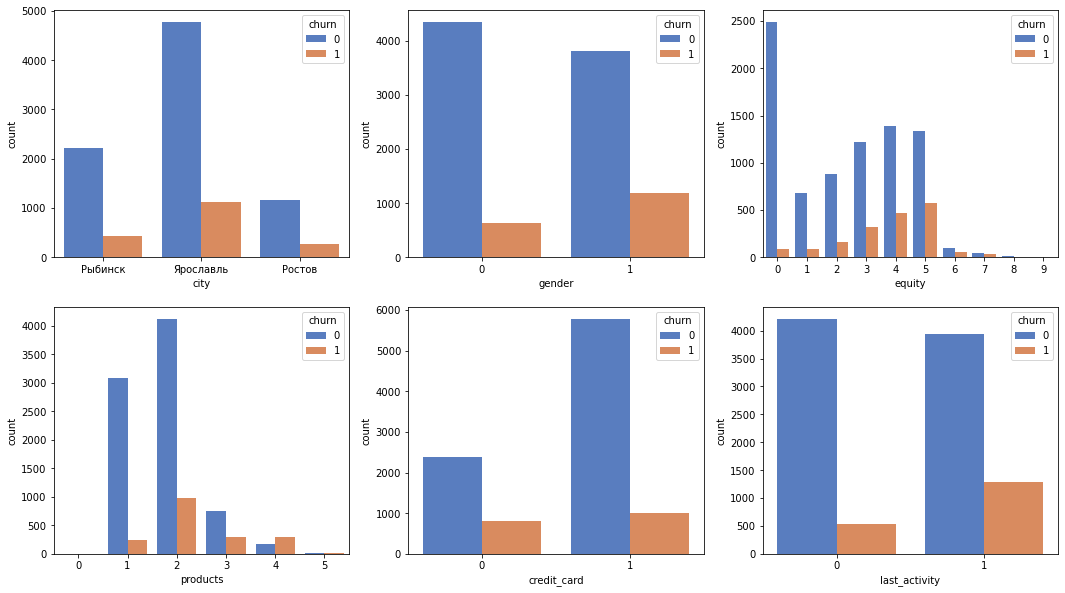

In [97]:
list_category = ['city','gender', 'equity','products','credit_card','last_activity']
plt.figure(figsize = (18,10))
for i in range(len(list_category)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df_new[list_category[i]],hue=df_new['churn'],palette='muted')
plt.show()

Отразим подробнее клиентов, пользующихся 4-мя услугами:

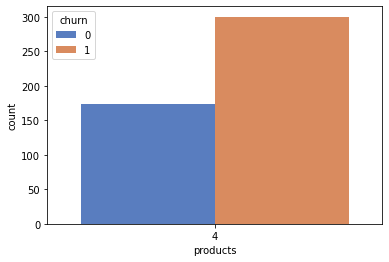

In [99]:
sns.countplot(data = df_new[df_new['products']==4],x='products',hue='churn',palette='muted')
plt.show()

Судя по столбчатым диаграммам, можно создать портрет клиентов ушедших в отток: чаще - мужчины, обладающие сравнительно высокой оценкой имущества (3-5 баллов), не оформлявшие кредитные карты (не нуждаются в них?), имеющих активность в последнем месяце, самая характерная черта - в отток уходит большая часть клиентов, пользующихся 4-мя услугами и значительная часть клиентов, пользующихся 3-мя услугами.

Представляется, что <b>в отток идут активные клиенты, в том числе любители копить большие суммы денежных средств и держать их на депозитном счете </b>(среди них мало предпринимателей - зарплата обычная, и мало пенсионеров - возраст средний). Возможно, их разочаровало изменение условий содержания вкладов (как предположение - снижение процентных ставок).

### Дифференциация по user_id

Также отразим клиентов ушедших в отток на точечной диаграмме по значению user_id:

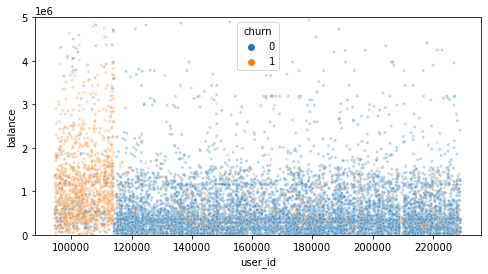

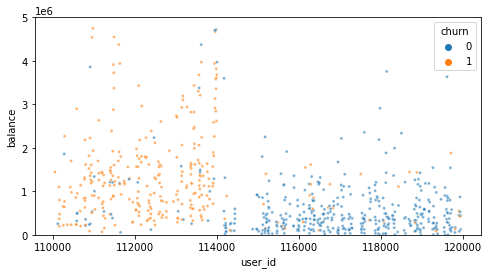

In [100]:
plt.figure(figsize = (8,4))
sns.scatterplot(data=df_new,x='user_id',y='balance',hue='churn',alpha=0.3,marker='.')
plt.ylim((0,5000000))
plt.show() 

plt.figure(figsize = (8,4))
sns.scatterplot(data=df_new[(df_new['user_id']<120000)&(df_new['user_id']>110000)],x='user_id',y='balance',hue='churn',alpha=0.6,marker='.')
plt.ylim((0,5000000))
plt.show() 

Промежуточный вывод: если предоставленные user_id были присвоены в порядке регистрации, то можно заключить, что <b>большинство клиентов уходящих в отток - первые клиенты с id < 114000, обладавшие большим остатком средств на счете</b>.

### Дифференциация по количеству используемых услуг

Проведем сегментацию пользователей по количеству используемых услуг (по значению столбца product):

In [101]:
round(
    df_new.groupby('products').agg('mean').join(
    df_new.groupby('products').agg({'churn':'count'}).rename(columns={'churn':'count'})
    ),2)

,user_id,score,gender,age,equity,balance,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya,count
products,,,,,,,,,,,,,,
0,100276.00,962.00,0.00,79.00,3.00,494007.58,0.00,0.00,25063.96,1.00,0.00,1.00,0.00,1
1,170109.68,853.50,0.54,41.85,1.33,697245.64,0.87,0.53,180541.58,0.07,0.13,0.26,0.61,3326
2,163125.93,844.51,0.48,43.18,3.15,810339.66,0.63,0.52,130626.03,0.19,0.16,0.30,0.54,5106
3,162782.56,837.38,0.43,45.92,3.52,1005215.32,0.35,0.42,128243.45,0.28,0.09,0.15,0.76,1046
4,104695.48,878.27,0.62,39.78,4.15,1267820.57,0.68,0.79,148788.95,0.63,0.15,0.20,0.65,474
5,102891.77,849.03,0.50,36.87,3.60,449041.88,0.63,0.90,100170.17,0.30,0.20,0.13,0.67,30


Итак, по количеству пользователей можно первую и последнюю строку не брать во внимание. Большинство пользователей пользуется 2 и 3 услугами.

У всех групп баллы кредитного скоринга примерно одинаковые.

Пол у клиентов, использующих 3 услугами, в среднем смещен в сторону женского пола (мужчин всего 43%), у использующих 4 услуги - в сторону мужского (мужчин 62%).

Средний возраст у всех групп, кроме бабули, не пользующейся ни одной услугой, в диапазоне около 37-45 лет.

По всем группам клиентов, кроме тех, что используют сразу пять услуг (эта категория пользователей весьма странная - самая молодая по возрасту, с самой низкой зарплатой, с самым малым балансом), прослеживается интересная закономерность: чем больше денежных средств на их счете, тем большим количеством услуг они пользуются, и тем больший отток у них фиксируется. Самыми успешными (финальными) в этом плане являются клиенты, пользующиемя сразу 4 услугами, именно среди этой группы наблюдается наибольший баланс - 1267 тыс руб и наибольший отток (63%).

Построим для числовых столбцов гистограммы, а для столбцов с категориальными данными - столбчатые диаграммы:

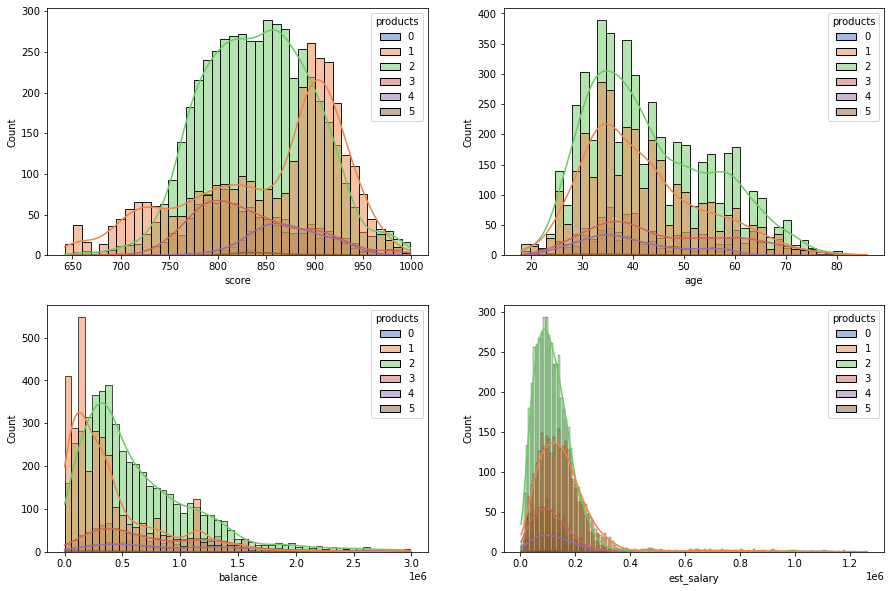

In [102]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15, 10))
# вытягиваем
ax = ax.flatten()
list_number = ['score','age', 'balance', 'est_salary']
df_new[df_new['balance']<3000000] # для ликвидации выбросов на гистограмме balance
for i in range(len(list_number)):
    sns.histplot(data = df_new[df_new['balance']<3000000], x = list_number[i], 
    hue='products', ax=ax[i], kde = True,palette='muted')
plt.show() 

Отразим подробнее гистограмму распределения количества клиентов с балансом от 1,5 до 10 млн рублей:

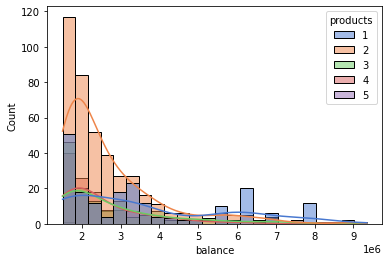

In [103]:
sns.histplot(data = df_new[(df_new['balance']>1500000)&(df_new['balance']<10000000)],
    x = 'balance', hue='products', kde = True,palette='muted')
plt.show() 

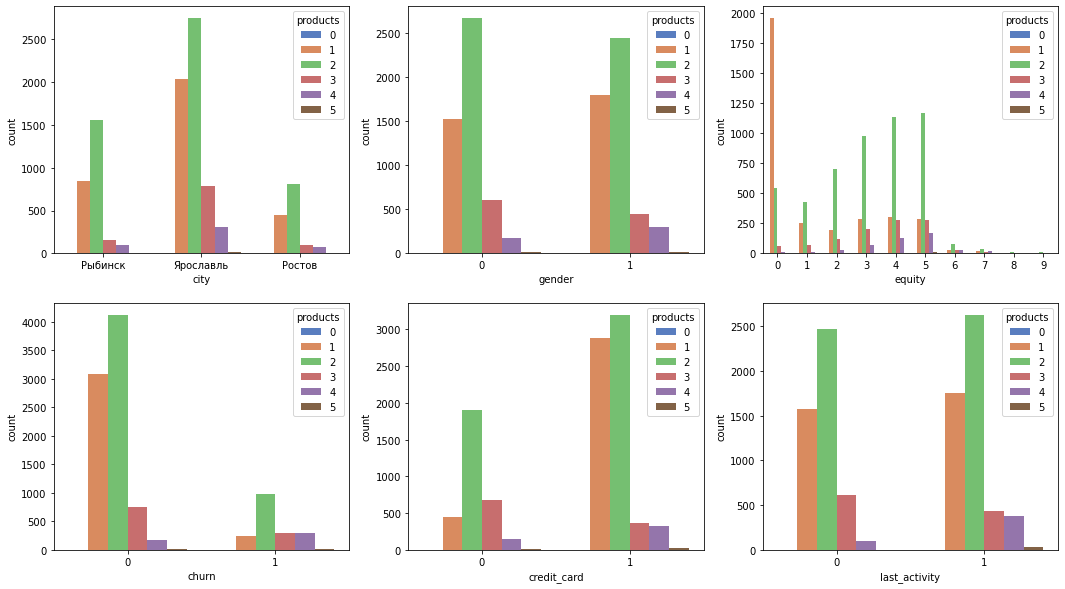

In [104]:
list_category = ['city','gender', 'equity','churn','credit_card','last_activity']
plt.figure(figsize = (18,10))
for i in range(len(list_category)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df_new[list_category[i]],hue=df_new['products'],palette='muted')
plt.show()

Промежуточный вывод: сдесь также можно констатировать, что много ушло в отток клиентов, ранее использующих четыре услуги (больше ушло, чем осталось), и значительное количество клиентов, использующих три услуги.

In [105]:
display(df_new[['churn','products']].groupby('products').agg(['mean','count']).T)
display(df_new[['churn']].agg({'churn':['mean',"count"]}))

products       0            1            2            3           4     5
churn mean   1.0     0.070655     0.191735     0.284895    0.632911   0.3
      count  1.0  3326.000000  5106.000000  1046.000000  474.000000  30.0

,churn
mean,0.18251
count,9983.00000


Промежуточный вывод: Наибольшая доля отточных клиентов в 4 (63%), 5 (30%), 3 (28%) и 2 (19%) группах, но их абсолютное число в этих группах составляет соответственно 300 (474х0,6329), 10 (30х0,3), 298 (1046х0,2848) и 979 человек (5106х0,1917). Поэтому можно сказать, что основное количество отточных клиентов пользуются 2, 4 и 3 услугами банка.  

In [106]:
list_category_ = ['gender', 'equity', 'credit_card', 'last_activity', 'products','user_id','churn']
list_category_1 = ['gender', 'equity', 'credit_card', 'last_activity', 'products','user_id']
print('Средние значения значений параметров по группам среди оставшихся клиентов:')
display(df_new[df_new['churn']==0][list_category_1].groupby('products').agg("mean").T.join(
    df_new[list_category_].groupby(["churn"]).agg("mean").T.rename(columns={0:'mean_all_group_0',1:'mean_all_group_1'}).
    drop(columns=['mean_all_group_1'])).style.background_gradient(cmap='coolwarm', axis=1).set_precision(2))

print('Средние значения значений параметров по группам среди клиентов, ушедших в отток:')
display(df_new[df_new['churn']==1][list_category_1].groupby('products').agg("mean").T.drop(columns=[0]).join(
    df_new[list_category_].groupby(["churn"]).agg("mean").T.rename(columns={0:'mean_all_group_0',1:'mean_all_group_1'}).
    drop(columns=['mean_all_group_0'])).style.background_gradient(cmap='coolwarm', axis=1).set_precision(2))


Средние значения значений параметров по группам среди оставшихся клиентов:


C:\Users\Павел\AppData\Local\Temp\ipykernel_4264\3910252183.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(df_new[df_new['churn']==0][list_category_1].groupby('products').agg("mean").T.join(


,1,2,3,4,5,mean_all_group_0
gender,0.53,0.44,0.37,0.55,0.48,0.47
equity,1.19,3.01,3.37,4.13,3.19,2.38
credit_card,0.86,0.67,0.36,0.50,0.52,0.71
last_activity,0.52,0.46,0.35,0.95,0.95,0.48
user_id,172068.56,171392.55,171367.17,103664.07,102448.48,170024.82


Средние значения значений параметров по группам среди клиентов, ушедших в отток:


C:\Users\Павел\AppData\Local\Temp\ipykernel_4264\3910252183.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(df_new[df_new['churn']==1][list_category_1].groupby('products').agg("mean").T.drop(columns=[0]).join(


,1,2,3,4,5,mean_all_group_1
gender,0.73,0.65,0.57,0.67,0.56,0.65
equity,3.11,3.75,3.90,4.17,4.56,3.76
credit_card,0.90,0.46,0.32,0.79,0.89,0.55
last_activity,0.66,0.75,0.59,0.70,0.78,0.70
user_id,144344.20,128277.81,141234.60,105293.70,103926.11,128549.12


Среди оставшихся клиентов преобладают женщины (мужчин 47%), а среди ушедших в отток преобладают мужчины (их 65%), и отличие пола по группам (по количеству потребляемых услуг) сравнительно небольшое.

Бальная оценка имущества у оставшихся и ушедших в отток тем больше, чем большим количеством услуг пользовались клиенты, но у клиентов ушедших в отток средняя бальная оценка имущества значительно больше, чем у оставшихся (в среднем на 1,38 балла).

В части процента использования кредитной картой сложно уловить закономерности: в среднем клиенты, ушедшие в отток реже пользовались кредитными картами (55% процентов против 71% у оставшихся клиентов), однако диффренециация этого значения по группам (по количеству потребляемых услуг) различна. Так, у пользующихся тремя  услугами банка, доля использования кредитных карт среди оставшихся (36%) и среди отточных (32%) похожа и на низком уровне, среди клиентов пользующихся одной услугой тоже похожа, но на высоком уровне (86 и 90% соответственно), а среди клиентов пользующихся двумя и четырьмя услугами отличается значительно. 

Хотя средняя активность за последний месяц среди оставшихся клиентов (48%) меньше, чем у клиентов, ушедших в отток (70%), з, дифференциация по группам (по количеству потребляемых услуг) очень не неоднородна: среди 4 группы активность в последнем месяце среди оставшихся (95%) больше, чем у ушедших в отток (70%), а среди 2 группы наоборот активность у оставшихся (46%) меньше, чем у отточных (75%).

В целом если рассматривать 4 группу, как содержащую наибольшую долю отточных клиентов, и сравнивать ее с другими, надо придти к выводу, что ни один из приведенных параметров не имеет ярко выраженного отличия, кроме user_id. Этот показатель наименьший у той группы, где наибольший отток. 

Промежуточный вывод: приведенный анализ подтверждает большую взаимосвязь на отток именно значения user_id, отражает низкую взаимосвязь оттока клиентов с такими параметрами, как наличие активности в последнем месяце, наличие кредитной карты, вместе с этим подтверждается и то, что клиенты уходящие в отток, как правило, имеют большую бальную оценку имущества и большую долю мужчин.

### Дифференциация среди самых высоких балансов
Уточним основную причину, отобрав клиентов из разных групп с большим балансом (более 4 млн):

In [107]:
round(
    df_new[df_new['balance']>4000000].groupby('churn').agg('mean').join(
    df_new[df_new['balance']>4000000].groupby('churn').agg({'churn':'count'}).
    rename(columns={'churn':'count'})
    ),2)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,city_ro,city_ri,city_ya,count
churn,,,,,,,,,,,,,,
0,159160.32,936.59,0.61,44.83,2.04,9767314.50,1.69,0.66,0.47,600870.13,0.04,0.20,0.76,157
1,108108.90,952.92,0.77,43.41,4.41,9322989.99,2.44,0.51,0.77,572661.87,0.05,0.21,0.74,39


Итак, перед нами средние данные по клиентам с наиболее большим балансом (в среднем более 9 млн рублей) разделенные на оставшихся и ушедших в отток. 

Количество оставшихся 158, ушедших в отток 39 (количество значительное).

Средние параметры двух категорий клиентов схожи (возраст, пол, баллы кредитного рейтинга, баланс, доля использования кредитных карт, даже доход и распределение по городам), отличает эти две группы три параметра: бальная оценка имущества клиента, количество используемых услуг (у оставшихся - 1,69, ушедших в отток - 2,44) и активность в последнем месяце (у оставшихся - 0,47, у ушедших в отток - 0,77).

То есть решающим фактором, влияющим на отток, представляется все-таки не баланс клиента (не процентная ставка по депозитам), а его активность (количество используемых услуг и активность в последний месяц). Уточним это на следующем шаге.

Так, если средний доход между отточными и оставшимися клиентами равен, то решающим фактором на отток нельзя считать высокий доход клиентов.

Промежуточный итог по шагу:
* Составлен портрет оставшихся клиентов и клиентов, ушедших в отток:
    * Не смотря на совпадение зарплаты межу двумя группами, к оттоку больше тяготеют активные (с активностью в последнем месяце - 70%) и более надежные клиенты (с более высоким кредитным рейтингом 863 баллов и балльной оценкой имущества клиента 3,76), чаще мужчины (65% мужчин), с низким числовым значением user_id (около 128тыс), и сравнительно большим количеством используемых продуктов 2,38, у которых часто отсутствует кредитная карта (используют в среднем только 55% клиентов), эти клиенты - обладатели счетов с очень большими суммами денежных средств, не характерными для большинства клиентов;
    * Оставшиеся клиенты отличаются меньшей активностью (48%), меньшей надежностью (кредитный рейтинг 845 - ниже среднего, низкая бальная оценка имущества 2,38), чаще женщины (мужчин всего 47%), с более высоким уровнем user_id (в среднем 170тыс), низким  количеством используемых продуктов - 1,76.
* К числу стратегически важных показателей нужно отнести:
    * значение user_id (у отточных до 114тыс, у оставшихся более 114тыс);
    * сопутствующий ему показатель - бальная оценка имущества клиента (для отточных в среднем 3 и более единиц).
    * остальные признаки не получили подтверждения при анализе после дифференциации на группы клиентов (использующие 1, 2, 3, 4 услуги и имеющих баланс более 4 млн руб).


## Шаг 4. Формулировка и проверка гипотез

Сформулируем нулевую гипотезу H₀: "Средний доход клиентов, которые пользуются двумя продуктами банка равен среднему доходу клиентов, которые пользуются тремя продуктами банка".

Сформулируем альтернативную гипотезу H₁ (утверждение, которое принимается верным, если отбрасывается H₀): "Средний доход клиентов, которые пользуются двумя продуктами банка не равен среднему доходу клиентов, которые пользуются тремя продуктами банка".

Воспользуемся методом scipy.stats.ttest_ind() c атрибутом qual=False в связи с разным размером выборок, а критический уровень статистической значимости примем равный 0,05 (рекомендуемый документацией для данного метода).

   Длина первого датафрейма 5106
   Длина второго датафрейма 1046

   Дисперсия данных в первом датафрейме  13738719493
   Дисперсия данных во втором датафрейме 13928341529

   p - значение: 0.5517472685394367 ( 0.5517 )
   Нет причин отвергать нулевую гипотезу о равенстве дохода между пользователями 2 и 3 продуктов


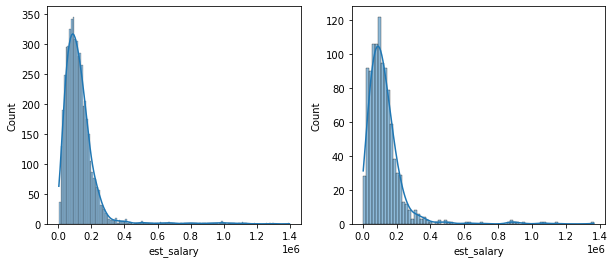

In [109]:
def hypothesis(text,alpha, df_1,df_2):     
    print('   Длина первого датафрейма', len(df_1))
    print('   Длина второго датафрейма', len(df_2))
    print()
    print('   Дисперсия данных в первом датафрейме ', round(np.var(df_1)))
    print('   Дисперсия данных во втором датафрейме', round(np.var(df_2)))
    print() 
    result = st.ttest_ind(df_1, df_2,equal_var = False)                  # активируем метод 
    print('   p - значение:',result.pvalue,'(',round(result.pvalue,4),')')                            # выводим на экран 
    if result.pvalue < alpha:
        print('   Отвергаем нулевую гипотезу',text)
    else:
        print('   Нет причин отвергать нулевую гипотезу',text)
    
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(10, 4))
    #вытягиваем
    ax = ax.flatten()
    sns.histplot(data = df_1, ax=ax[0], kde = True,palette='muted')
    sns.histplot(data = df_2, ax=ax[1], kde = True,palette='muted')
    plt.show() 
    
hypothesis('о равенстве дохода между пользователями 2 и 3 продуктов',0.05, df_new[df_new['products']==2]['est_salary'],
    df_new[df_new['products']==3]['est_salary'])

Не менее важной является проверка следующей нулевой гипотезы H₀:"Средний доход клиентов, ушедших в отток равен среднему доходу оставшихся клиентов".

Альтернативная гипотеза H₁ (утверждение, которое принимается верным, если отбрасывается H₀): "Средний доход клиентов, ушедших в отток не равен среднему доходу оставшихся клиентов".

   Длина первого датафрейма 1822
   Длина второго датафрейма 8161

   Дисперсия данных в первом датафрейме  15087463266
   Дисперсия данных во втором датафрейме 20351780499

   p - значение: 0.8718112486231356 ( 0.8718 )
   Нет причин отвергать нулевую гипотезу о равенстве дохода клиентов оставшихся и ушедших в отток


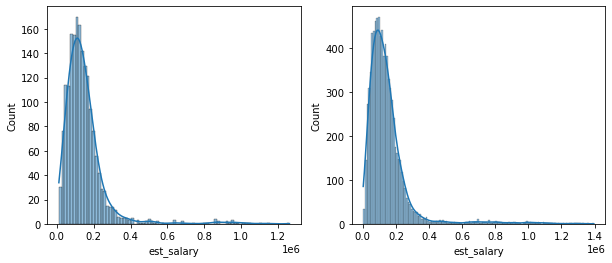

In [110]:
hypothesis('о равенстве дохода клиентов оставшихся и ушедших в отток',0.05, df_new[df_new['churn']==1]['est_salary'],
    df_new[df_new['churn']==0]['est_salary'])

   Длина первого датафрейма 1822
   Длина второго датафрейма 8161

   Дисперсия данных в первом датафрейме  4132617679035
   Дисперсия данных во втором датафрейме 5011538637422

   p - значение: 4.313590745773424e-13 ( 0.0 )
   Отвергаем нулевую гипотезу о равенстве баланса клиентов оставшихся и ушедших в отток


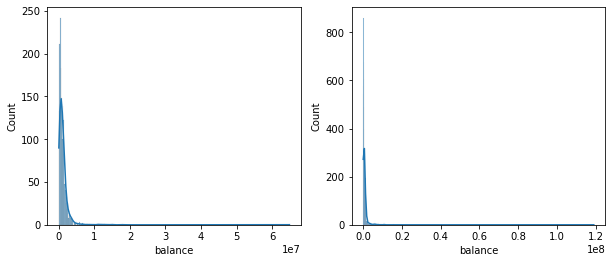

In [111]:
hypothesis('о равенстве баланса клиентов оставшихся и ушедших в отток',0.05, df_new[df_new['churn']==1]['balance'],
    df_new[df_new['churn']==0]['balance'])

   Длина первого датафрейма 1822
   Длина второго датафрейма 8161

   Дисперсия данных в первом датафрейме  1486449210
   Дисперсия данных во втором датафрейме 1209417005

   p - значение: 2.725882285766674e-295 ( 0.0 )
   Отвергаем нулевую гипотезу о равенстве user_id клиентов оставшихся и ушедших в отток


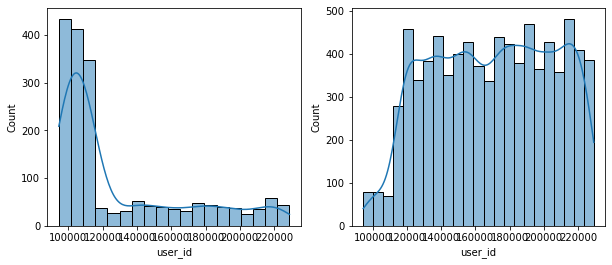

In [112]:
hypothesis('о равенстве user_id клиентов оставшихся и ушедших в отток',0.05, df_new[df_new['churn']==1]['user_id'],
    df_new[df_new['churn']==0]['user_id'])

   Длина первого датафрейма 1822
   Длина второго датафрейма 8161

   Дисперсия данных в первом датафрейме  2459
   Дисперсия данных во втором датафрейме 4676

   p - значение: 3.677597317993513e-39 ( 0.0 )
   Отвергаем нулевую гипотезу о равенстве баллов кредитного скоринга клиентов оставшихся и ушедших в отток


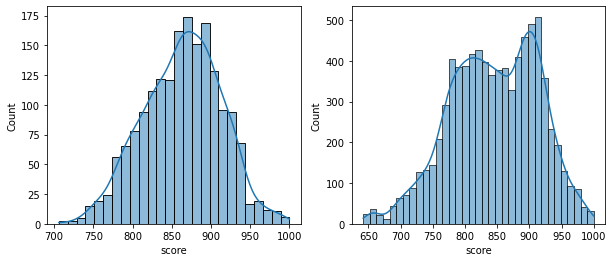

In [113]:
hypothesis('о равенстве баллов кредитного скоринга клиентов оставшихся и ушедших в отток',0.05, df_new[df_new['churn']==1]['score'],
    df_new[df_new['churn']==0]['score'])

   Длина первого датафрейма 1822
   Длина второго датафрейма 8161

   Дисперсия данных в первом датафрейме  3
   Дисперсия данных во втором датафрейме 4

   p - значение: 5.206117103219819e-197 ( 0.0 )
   Отвергаем нулевую гипотезу о равенстве балльной оценки имущества клиентов оставшихся и ушедших в отток


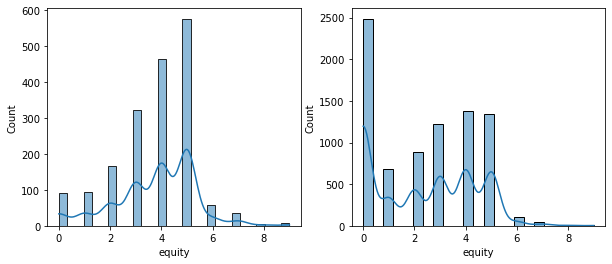

In [114]:
hypothesis('о равенстве балльной оценки имущества клиентов оставшихся и ушедших в отток',0.05, df_new[df_new['churn']==1]['equity'],
    df_new[df_new['churn']==0]['equity'])

Промежуточный вывод: поскольку доход обоих категорий (использующих 2 и 3 услуги) клиентов равен, нет оснований говорить о различном социально-экономическом положении клиентов этих категорий.

Поскольку доход ушедших в отток и оставшихся клиентов равен, нет оснований говорить о различном социально-экономическом положении клиентов ушедших в отток (среди ушедших в отток нет большого числа пенсионеров или предпринимателей, их доход примерно равен среднему доходу других клиентов). 

Однако, ярко выраженный факт значительно большего баланса у клиентов ушедших в отток по сравнению с оставшимися позволяет предположить, что ушедшие в отток клиенты активно использовали услугу хранения денежных средств на депозитных счетах (и поэтому мало оформляли кредитные карты).

Еще более ярко выражены статистические различия значения user_id между клиентами ушедшими в отток и оставшимися.  

В данном шаге использовался один из методов - scipy.stats.ttest_ind() t-критерия Стьюдента, позволяющий проверять гипотезы о равенстве средних двух генеральных зависимостей.
Данный метод может применяться при соблюдении следующих условий:
* генеральные совокупности не зависят друг от друга;
* одна генеральная совокупность не является откорректированной версией генеральной другой совокупности;
* выборочные средние должны быть нормально распределены;
* дисперсии генеральных совокупностей должны быть равны (если выборки имеют менее 30 значений).

В данном случае применяется атрибут qual=False, позволящий проверять гипотезы с разным размером выборок и разной дисперсией. 

Для рассмотренных массивов данные условия соблюдены.

Критический уровень статистической значимости принят равным 0,05 в соответствие с рекомендациями в документации для данного метода.

## Шаг 5. Сегментация

Осуществим сегментацию в соответствие с ранее указанным стратегически важным показателем, в частности, значение user_id (у отточных до 114тыс, у оставшихся более 114тыс):

In [118]:
def segment_kategory(user_id):
    if user_id < 114000:
        return 1
    return 0

df_new['segment'] = df_new['user_id'].apply(segment_kategory)

df_new.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya,cluster,segment
0,106217,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,3,1
1,146556,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,0,30,0,217572.05,1,1,1,107683.34,0,0,1,0,0,0
3,113370,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,3,1
4,157978,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,0


Выведем на экран статистические данные по этим сегментам:

In [119]:
df_segment = round(df_new.groupby('segment').agg('mean').T,2).rename(columns={0:'segment_0',1:'segment_1'})

df_describe = round(df_new.describe(),2).T[['mean','min','25%','50%','75%','max']]
df_segment = df_segment.join(df_describe)
df_segment['max'] = round(df_segment['max'])
df_segment

,segment_0,segment_1,mean,min,25%,50%,75%,max
user_id,172196.50,104332.86,162455.08,94561.0,128567.00,162464.00,196192.00,229145.0
score,842.29,884.75,848.39,642.0,801.00,853.00,900.00,1000.0
gender,0.48,0.61,0.50,0.0,0.00,1.00,1.00,1.0
age,43.47,39.12,42.85,18.0,34.00,40.00,51.00,86.0
equity,2.38,4.13,2.63,0.0,0.00,3.00,4.00,9.0
balance,712445.76,1417717.71,813683.34,0.0,217572.05,434204.33,917854.68,119113552.0
products,1.73,2.76,1.88,0.0,1.00,2.00,2.00,5.0
credit_card,0.72,0.45,0.68,0.0,0.00,1.00,1.00,1.0
last_activity,0.47,0.86,0.52,0.0,0.00,1.00,1.00,1.0
est_salary,144118.84,169532.83,147766.86,2546.3,75229.89,119553.34,174495.66,1395064.0


В сегмент "1" попали клиенты, как уже ушедшие, так и имеющие высокий риск оттока. Таким образом можно вывести перечень клиентов, которые должны в ближайшее время уйти в отток, если их не остановить:

In [120]:
risk =df_new[(df_new['segment']==1)&(df_new['churn']==0)]
display(risk.head())
print('Всего клиентов, прогнозируемых к оттоку:',len(risk))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_ro,city_ri,city_ya,cluster,segment
76,111398,922.0,Ярославль,0,37,5,1214707.38,4,0,1,85121.07,0,0,0,1,3,1
94,107713,821.0,Ростов,0,30,3,157677.78,4,0,1,36397.02,0,1,0,0,3,1
103,97030,841.0,Ростов,1,29,1,175505.11,4,1,1,48188.69,0,1,0,0,3,1
125,113662,1000.0,Ярославль,1,32,5,19757180.85,2,1,1,1024626.50,0,0,0,1,2,1
172,107612,906.0,Ярославль,0,32,4,895645.72,4,0,1,101311.52,0,0,0,1,3,1


Всего клиентов, прогнозируемых к оттоку: 251


Отразим потери и прогноз потерь денежных средств, являющийся следствием оттока клиентов:

In [121]:
print('Всего на счетах в банке было, млн. руб.',
    round(df_new['balance'].sum()/1000000,3))
print('Уже выведено денежных средств из-за оттока клиентов, млн. руб.',
    round(df_new['balance'][df_new['churn']==1].sum()/1000000,3))
print('Прогноз оттока денежных средств, млн. руб.',
    round(risk['balance'].sum()/1000000,3))

Всего на счетах в банке было, млн. руб. 8123.001
Уже выведено денежных средств из-за оттока клиентов, млн. руб. 2064.724
Прогноз оттока денежных средств, млн. руб. 432.413


## Выводы

* Стратегически важный показатель клиентов уходящих в отток - значение user_id (у отточных до 114тыс).
* У клиентов, уходящих в отток также фиксируются: более высокая надежность (кредитный рейтинг 885 при среднем значении 848 и балльная оценка имущества клиента в среднем 4,13 при среднем уровне 2,63), более высокий средний уровень активности (доля активных в последнем месяце - 86% при среднем уровне 52%), большая доля мужчин - 61% при среднем значении 50%, количество используемых услуг банка в среднем 2,76 при среднем уровне 1,78, у которых часто отсутствует кредитная карта- доля имеющих карту 45% при среднем уровне 68%, более высокий баланс у клиентов в среднем 1418 тыс при среднем уровне 815 тыс руб.
* Нет оснований говорить о различном социально-экономическом положении клиентов ушедших в отток.
* Вероятно, в отток уходят любители копить большие суммы денежных средств и держать их на депозитном счете (среди них мало предпринимателей - зарплата обычная, и мало пенсионеров - возраст средний). Возможно, их разочаровало изменение условий содержания вкладов. 
* В конце работы создан датафрейм risk с перечнем 251 клиента, прогнозируемых к оттоку. Прогноз оттока денежных средств - 432 миллиона рублей.
* Для улучшения ситуации предлагается пересмотреть условия обслуживания клиентов (предположительно, изменились условия преоставления услуги содержания вкладов), так как новые условия получили крайне негативную оценку у "старых" клиентов и ведут к их оттоку, а вместе с ними и значительной суммы денежных средств. Усилия направить на клиентов из перечня risk, а также, по-возможности, вернуть клиентов уже ушедших в отток.

Ссылка на презентацию: [Презентация](https://disk.yandex.ru/i/Pz-bxuGTuL0VCA)